## Module 4 Challenge: 
### Portfolio Returns: Volatility, Sharpe Ratios, Returns, and Risk 
This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`



In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

## Whale Returns 
Read the Whale Portfolio daily returns and clean the data

In [2]:
# Set the file path 
whale_returns = Path("/Users/kaylahoffman/Downloads/Portfolio_Returns/Module_4_Files/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

# Check for nulls
whale_df.isnull().sum() 

# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns
Read the Algorithmic Daily Returns and clean the data

In [3]:
# Set the file path 
algo_returns = Path("/Users/kaylahoffman/Downloads/Portfolio_Returns/Module_4_Files/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

# Check for nulls
algo_df.isnull().sum() 

# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns 
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [4]:
# Set the file path 
SP500_returns = Path("/Users/kaylahoffman/Downloads/Portfolio_Returns/Module_4_Files/Resources/sp500_history.csv")
SP500_df = pd.read_csv(SP500_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500_df.head()

# Check the Datatypes 
print(SP500_df.dtypes)

# Fix the data types 
# Remove the dollar signs, commas-- str.replace (replace with empty space)
SP500_df = SP500_df.replace({'\$': '', ',': ''}, regex=True)

# Then change to a dtype float -- astype("float")
SP500_df = SP500_df.astype(float)

# Calculate the Daily Returns 
SP500_returns = SP500_df.pct_change().dropna()
SP500_returns.head()

Close    object
dtype: object


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and SP500 Returns 

In [5]:
combined_df = pd.concat([whale_df, algo_df, SP500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


## Conduct Quantitative Analysis 
In this section you will calculate and visualize performance and risk metrics for the portfolios.

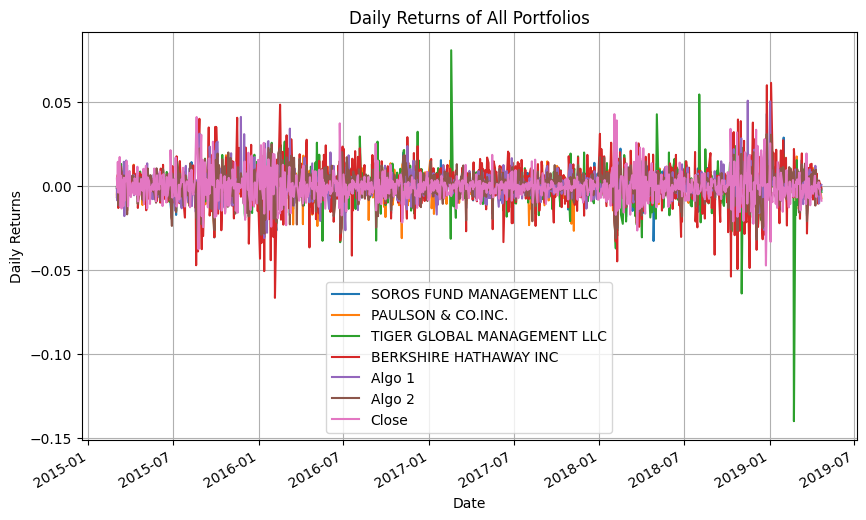

In [6]:
# Plot the daily returns of all portfolios 
combined_df.plot(figsize=(10, 6))  # Adjust the figure size as needed

plt.title('Daily Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

## Calculate and Plot cumulative returns

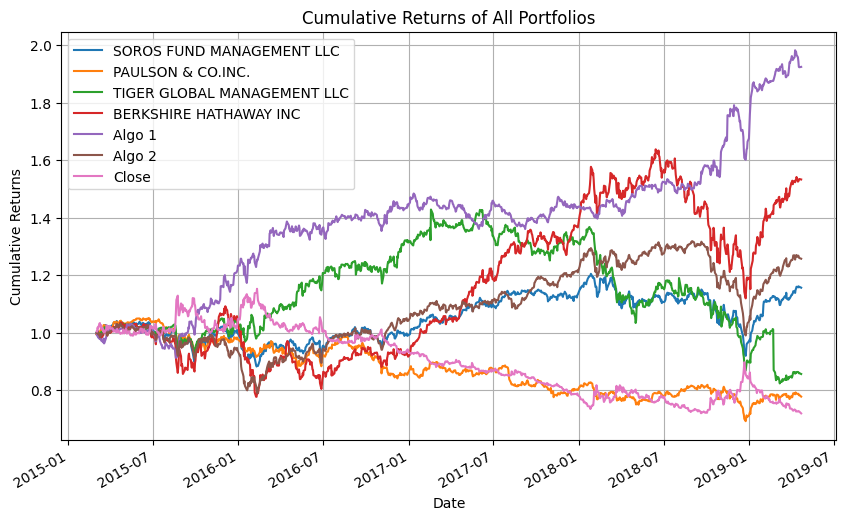

In [7]:
# Calculate cumulative returns of all portfolios 
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot the cumulative returns 
cumulative_returns.plot(figsize=(10,6))
plt.title('Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Risk Analysis

Determine the risk of each portfolio. 
1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kaylahoffman/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


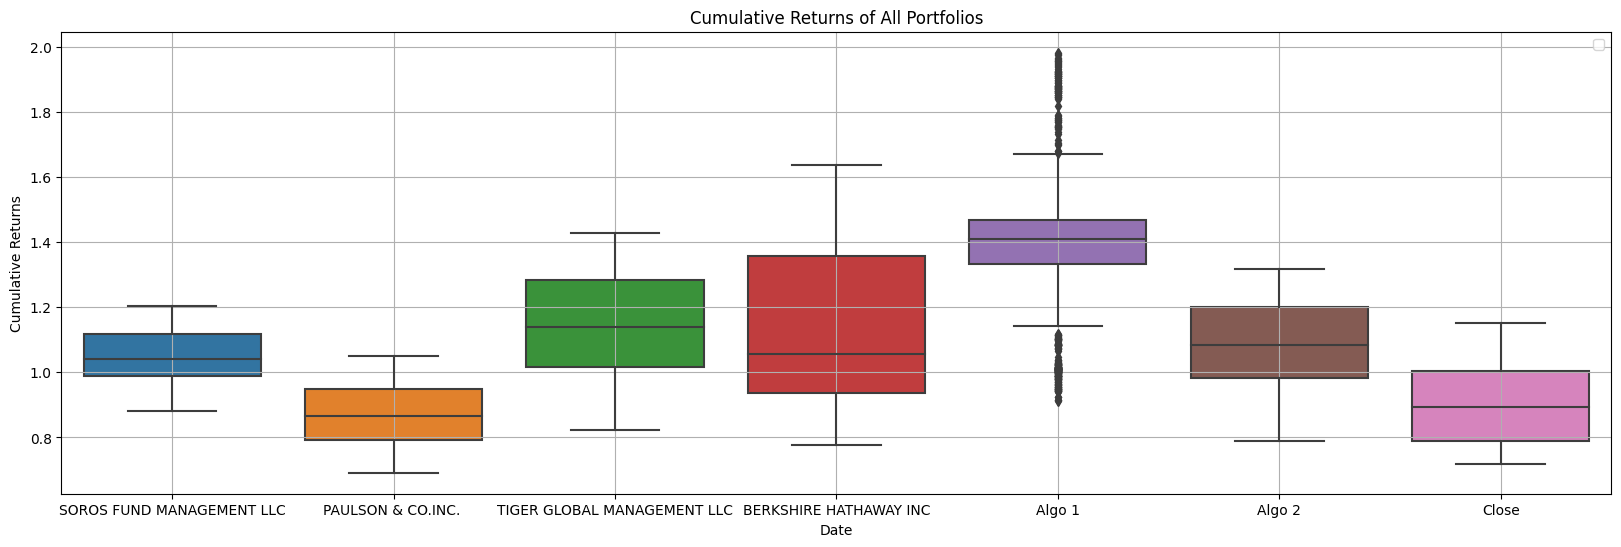

In [8]:
import seaborn as sns

# Box plot to visually show risk: Whale Returns
plt.figure(figsize=(20,6))
sns.boxplot(data=cumulative_returns)
plt.title('Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

### Calculate Standard Deviations

In [9]:
# Calculate the daily Standard Deviations of all Portfolios 
cumulative_returns.std()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


### Determine which portfolios are riskier than the S&P 500

In [10]:
# Calculate the daily standard deviation of S&P 500
SP500_std_daily = SP500_df.std().iloc[0]
print("S&P 500 Daily Standard Deviation:", SP500_std_daily)

# Determine which portfolios are riskier than the S&P 500
portfolio_std = cumulative_returns.std()
print("Portfolios' Daily Standard Deviation:\n", portfolio_std)

riskier_portfolios = portfolio_std[portfolio_std > SP500_std_daily]
print("Portfolios Riskier than S&P 500:\n", riskier_portfolios)

S&P 500 Daily Standard Deviation: 402.12200401298577
Portfolios' Daily Standard Deviation:
 SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
Close                          0.114846
dtype: float64
Portfolios Riskier than S&P 500:
 Series([], dtype: float64)


In [11]:
# Determine the risk of all portfolios 
volatility = cumulative_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility.head()

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
Close                          1.823124
Algo 2                         2.089756
TIGER GLOBAL MANAGEMENT LLC    2.375658
dtype: float64

### Calculate the Annualized Standard Deviation 

In [12]:
# Calculate the Annualized Standard Deviation (252 Trading Days)
annualized_sp500_std = SP500_std_daily * np.sqrt(252)
annualized_portfolio_std = portfolio_std * np.sqrt(252)

# Output the results
print("Annualized S&P 500 Standard Deviation:", annualized_sp500_std)
print("Annualized Portfolios' Standard Deviation:\n", annualized_portfolio_std)

Annualized S&P 500 Standard Deviation: 6383.488915951666
Annualized Portfolios' Standard Deviation:
 SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
Close                          1.823124
dtype: float64


# Rolling Statistics 
Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

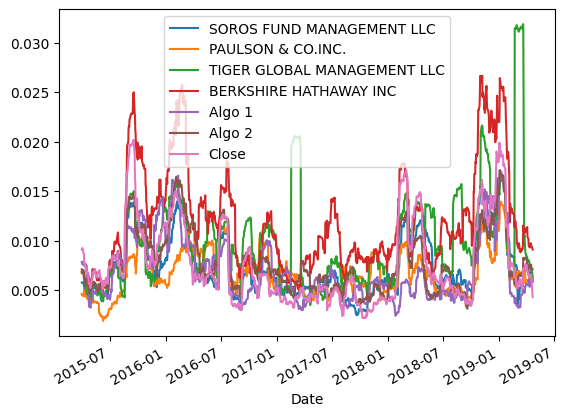

In [13]:
# Calculate the rolling Standard Deviation for all portfolios using a 21 day window 
# Plot the rolling Std. Deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

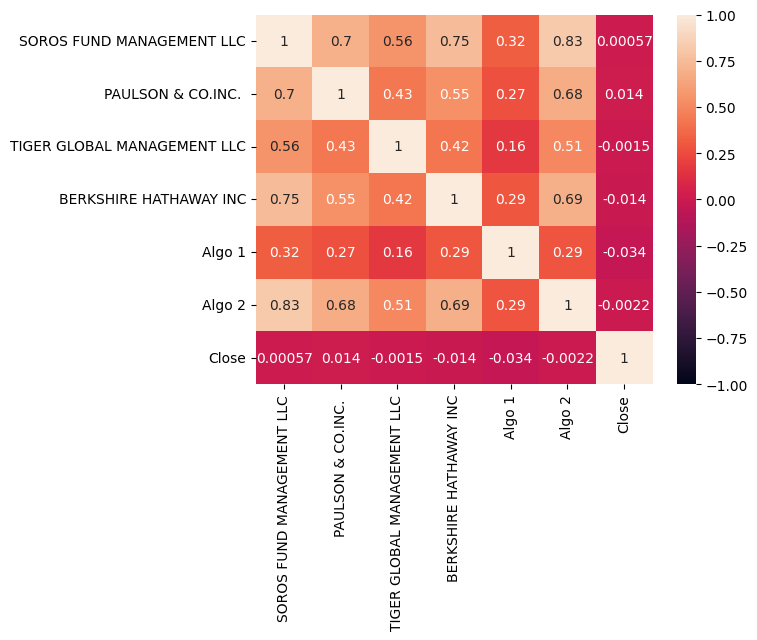

In [14]:
# Calculate the correlation 
correlation = combined_df.corr()
correlation

# Plot the correlation using a heatmap
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the SP500

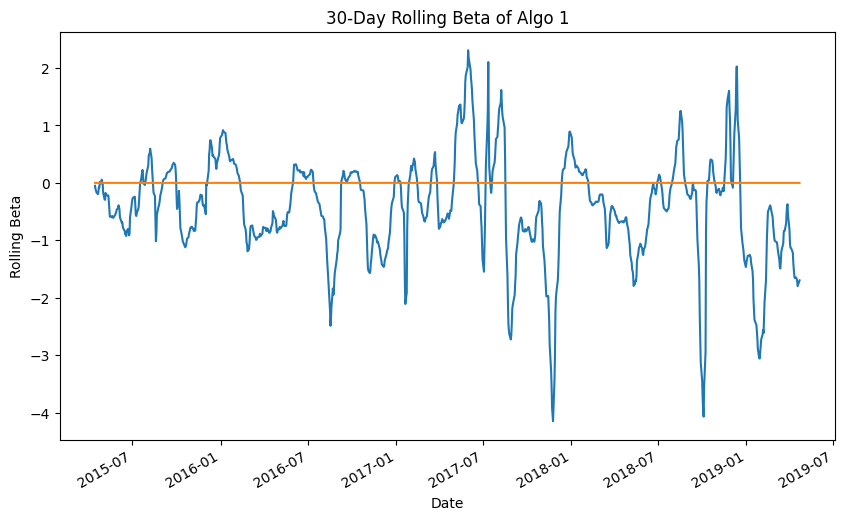

In [15]:
# Calculate covariance of a single portfolio
rolling_covariance = cumulative_returns['Algo 1'].rolling(window=30).cov(cumulative_returns['Close'])
#covariance = algo_df.cov()

# Calculate variance of S&P 500
rolling_variance = cumulative_returns['Close'].rolling(window=30).var()

# Computing beta
rolling_beta = rolling_covariance/rolling_variance 

# Plot beta trend
plt.figure(figsize=(10,6))
rolling_beta.plot(title='30-Day Rolling Beta of Algo 1')
rolling_variance.plot(label='Algo 1')
plt.ylabel('Rolling Beta')
plt.xlabel('Date')
plt.show()

# Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [16]:
# Use 'ewm' to calculate the rolling window of each portfolio
ewm_cumulative_returns = cumulative_returns.ewm(span=21).std()
ewm_cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.001575,0.002281,0.001791,0.002959,0.006061,0.001707,0.000848
2015-03-05,0.003192,0.003666,0.001408,0.005532,0.005130,0.003444,0.008204
2015-03-06,0.003545,0.002920,0.004208,0.005947,0.005883,0.005027,0.006999
2015-03-09,0.003277,0.003181,0.003556,0.006058,0.007282,0.004748,0.011618
...,...,...,...,...,...,...,...
2019-04-15,0.018828,0.007142,0.027209,0.036810,0.032056,0.022412,0.013148
2019-04-16,0.019422,0.006926,0.026003,0.035602,0.030564,0.021955,0.012853
2019-04-17,0.019390,0.006613,0.024797,0.034636,0.029752,0.021098,0.012597


# Sharpe Ratios 
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [17]:
# Annualized Sharpe Ratios 
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
Close                         -0.518582
dtype: float64

<AxesSubplot:>

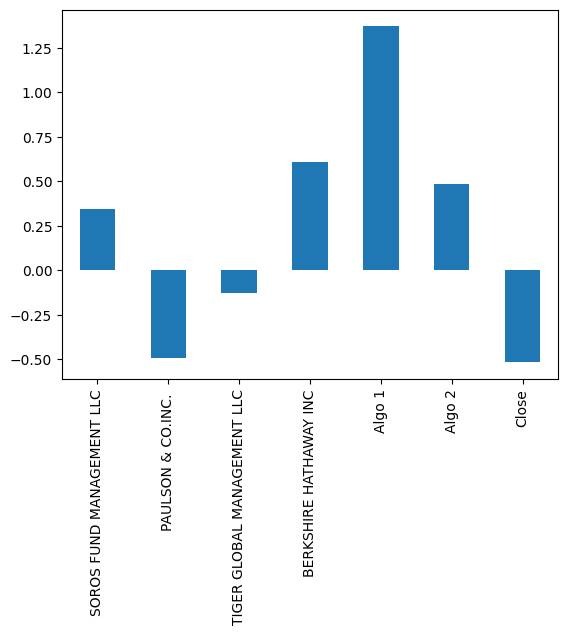

In [18]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio 
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [19]:
import yfinance as yf

In [20]:
# Define the stock ticker and date range
AAPL_stock = 'AAPL'
start_date = '2012-01-01'  # example start date
end_date = '2012-12-31'    # example end date

# Download the stock data
data_AAPL = yf.download(AAPL_stock, start=start_date, end=end_date)

# Print the type of the data
print(type(data_AAPL))

# Print the first few columns of the data
print(data_AAPL.iloc[:, :5])  # This prints the first three columns of the DataFrame


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
                 Open       High        Low      Close  Adj Close
Date                                                             
2012-01-03  14.621429  14.732143  14.607143  14.686786  12.449691
2012-01-04  14.642857  14.810000  14.617143  14.765714  12.516595
2012-01-05  14.819643  14.948214  14.738214  14.929643  12.655557
2012-01-06  14.991786  15.098214  14.972143  15.085714  12.787855
2012-01-09  15.196429  15.276786  15.048214  15.061786  12.767572
...               ...        ...        ...        ...        ...
2012-12-21  18.302500  18.559643  18.222857  18.547501  15.861958
2012-12-24  18.583929  18.723213  18.525356  18.577499  15.887616
2012-12-26  18.535713  18.552143  18.254286  18.321428  15.668628
2012-12-27  18.340714  18.437500  18.023571  18.395000  15.731547
2012-12-28  18.224644  18.374287  18.147142  18.199642  15.564476

[249 rows x 5 columns]


In [21]:
# Define the stock ticker and date range
NVDA_stock = 'NVDA'
start_date = '2012-01-01'  # example start date
end_date = '2012-12-31'    # example end date

# Download the stock data
data_NVDA = yf.download(NVDA_stock, start=start_date, end=end_date)

# Print the type of the data
print(type(data_NVDA))

# Print the first few columns of the data
print(data_NVDA.iloc[:, :5])  # This prints the first three columns of the DataFrame

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
              Open    High     Low   Close  Adj Close
Date                                                 
2012-01-03  3.5750  3.6000  3.5025  3.5100   3.219882
2012-01-04  3.5125  3.5650  3.4800  3.5500   3.256576
2012-01-05  3.5325  3.6950  3.5175  3.6775   3.373537
2012-01-06  3.6750  3.6775  3.5925  3.6350   3.334551
2012-01-09  3.6375  3.7050  3.6100  3.6350   3.334551
...            ...     ...     ...     ...        ...
2012-12-21  3.1175  3.1175  3.0525  3.0875   2.850576
2012-12-24  3.0850  3.0950  3.0525  3.0625   2.827495
2012-12-26  3.0550  3.1050  3.0475  3.0600   2.825187
2012-12-27  3.0650  3.0700  3.0050  3.0400   2.806721
2012-12-28  3.0125  3.0725  3.0075  3.0250   2.792872

[249 rows x 5 columns]


In [22]:
# Define the stock ticker and date range
KO_stock = 'KO'
start_date = '2012-01-01'  # example start date
end_date = '2012-12-31'    # example end date

# Download the stock data
data_KO = yf.download(KO_stock, start=start_date, end=end_date)

# Print the type of the data
print(type(data_KO))

# Print the first few columns of the data
print(data_KO.iloc[:, :5])  # This prints the first three columns of the DataFrame


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
                 Open       High        Low      Close  Adj Close
Date                                                             
2012-01-03  35.075001  35.355000  35.049999  35.070000  24.140409
2012-01-04  34.955002  35.035000  34.750000  34.849998  23.988976
2012-01-05  34.880001  34.935001  34.674999  34.685001  23.875399
2012-01-06  34.735001  34.814999  34.310001  34.465000  23.723957
2012-01-09  34.500000  34.584999  34.400002  34.465000  23.723957
...               ...        ...        ...        ...        ...
2012-12-21  37.000000  37.189999  36.529999  36.889999  26.106800
2012-12-24  36.720001  36.799999  36.570000  36.730000  25.993572
2012-12-26  36.700001  36.799999  36.240002  36.419998  25.774176
2012-12-27  36.349998  36.549999  36.200001  36.419998  25.774176
2012-12-28  36.220001  36.419998  35.950001  35.970001  25.455721

[249 rows x 5 columns]


In [23]:
# Define the stock ticker and date range
MS_stock = 'MS'
start_date = '2012-01-01'  # example start date
end_date = '2012-12-31'    # example end date

# Download the stock data
data_MS = yf.download(MS_stock, start=start_date, end=end_date)

# Print the type of the data
print(type(data_MS))

# Print the first few columns of the data
print(data_MS.iloc[:, :5])  # This prints the first three columns of the DataFrame

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
                 Open       High        Low      Close  Adj Close
Date                                                             
2012-01-03  15.760000  16.290001  15.710000  16.080000  12.316105
2012-01-04  15.750000  16.080000  15.500000  15.940000  12.208880
2012-01-05  15.590000  16.400000  15.430000  16.280001  12.469294
2012-01-06  16.080000  16.250000  15.800000  15.900000  12.178243
2012-01-09  16.000000  16.450001  15.930000  16.200001  12.408021
...               ...        ...        ...        ...        ...
2012-12-21  18.740000  19.080000  18.570000  18.920000  14.673108
2012-12-24  18.900000  18.980000  18.820000  18.950001  14.696366
2012-12-26  19.020000  19.110001  18.840000  18.879999  14.642079
2012-12-27  18.940001  19.070000  18.500000  18.770000  14.556772
2012-12-28  18.559999  18.770000  18.559999  18.620001  14.440450

[249 rows x 5 columns]


In [24]:
# Combine all stocks into a single Dataframe 
custom_portfolio_df = pd.concat([data_AAPL,data_NVDA,data_KO,data_MS], axis="columns", join="inner")
custom_portfolio_df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800,3.5750,3.6000,3.5025,3.5100,...,35.049999,35.070000,24.140409,15639600,15.76,16.290001,15.71,16.080000,12.316105,25777400
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516595,260022000,3.5125,3.5650,3.4800,3.5500,...,34.750000,34.849998,23.988976,14239200,15.75,16.080000,15.50,15.940000,12.208880,20699600
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600,3.5325,3.6950,3.5175,3.6775,...,34.674999,34.685001,23.875399,14287600,15.59,16.400000,15.43,16.280001,12.469294,30615100
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800,3.6750,3.6775,3.5925,3.6350,...,34.310001,34.465000,23.723957,13646600,16.08,16.250000,15.80,15.900000,12.178243,21677700
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767572,394024400,3.6375,3.7050,3.6100,3.6350,...,34.400002,34.465000,23.723957,10522600,16.00,16.450001,15.93,16.200001,12.408021,19102900


In [26]:
# Ensure you have pandas imported
import pandas as pd

# Example starting date
start_date = '2012-01-01'

# Create a date range that matches the length of your DataFrame
date_range = pd.date_range(start=start_date, periods=len(custom_portfolio_df), freq='D')

# Set the date range as the new index
custom_portfolio_df.index = date_range
date_range 
custom_portfolio_df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,...,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
2012-01-01,14.621429,14.732143,14.607143,14.686786,12.449691,302220800,3.5750,3.6000,3.5025,3.5100,...,35.049999,35.070000,24.140409,15639600,15.76,16.290001,15.71,16.080000,12.316105,25777400
2012-01-02,14.642857,14.810000,14.617143,14.765714,12.516595,260022000,3.5125,3.5650,3.4800,3.5500,...,34.750000,34.849998,23.988976,14239200,15.75,16.080000,15.50,15.940000,12.208880,20699600
2012-01-03,14.819643,14.948214,14.738214,14.929643,12.655557,271269600,3.5325,3.6950,3.5175,3.6775,...,34.674999,34.685001,23.875399,14287600,15.59,16.400000,15.43,16.280001,12.469294,30615100
2012-01-04,14.991786,15.098214,14.972143,15.085714,12.787855,318292800,3.6750,3.6775,3.5925,3.6350,...,34.310001,34.465000,23.723957,13646600,16.08,16.250000,15.80,15.900000,12.178243,21677700
2012-01-05,15.196429,15.276786,15.048214,15.061786,12.767572,394024400,3.6375,3.7050,3.6100,3.6350,...,34.400002,34.465000,23.723957,10522600,16.00,16.450001,15.93,16.200001,12.408021,19102900


In [27]:
small_df=custom_portfolio_df['Close']
small_df.columns=['AAPL', 'NVDA', 'PYPL','MS']
small_df

,AAPL,NVDA,PYPL,MS
2012-01-01,14.686786,3.5100,35.070000,16.080000
2012-01-02,14.765714,3.5500,34.849998,15.940000
2012-01-03,14.929643,3.6775,34.685001,16.280001
2012-01-04,15.085714,3.6350,34.465000,15.900000
2012-01-05,15.061786,3.6350,34.465000,16.200001
...,...,...,...,...
2012-09-01,18.547501,3.0875,36.889999,18.920000
2012-09-02,18.577499,3.0625,36.730000,18.950001
2012-09-03,18.321428,3.0600,36.419998,18.879999
2012-09-04,18.395000,3.0400,36.419998,18.770000


In [28]:
# Calculate daily returns, drop nas, and display the data 
custom_returns = small_df.pct_change().dropna()
custom_returns.head()

,AAPL,NVDA,PYPL,MS
2012-01-02,0.005374,0.011396,-0.006273,-0.008706
2012-01-03,0.011102,0.035916,-0.004734,0.021330
2012-01-04,0.010454,-0.011557,-0.006343,-0.023342
2012-01-05,-0.001586,0.000000,0.000000,0.018868
2012-01-06,0.003580,-0.004127,0.005948,0.042593


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [29]:
# Set weights
weights = [1/3, 1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = (weights * custom_returns).sum(axis=1)

# Display sample data
portfolio_return.head()

2012-01-02    0.000597
2012-01-03    0.021204
2012-01-04   -0.010262
2012-01-05    0.005761
2012-01-06    0.015998
Freq: D, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [30]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio = pd.concat([portfolio_return,custom_returns], axis="columns", join="inner")
joined_portfolio

,0,AAPL,NVDA,PYPL,MS
2012-01-02,0.000597,0.005374,0.011396,-0.006273,-0.008706
2012-01-03,0.021204,0.011102,0.035916,-0.004734,0.021330
2012-01-04,-0.010262,0.010454,-0.011557,-0.006343,-0.023342
2012-01-05,0.005761,-0.001586,0.000000,0.000000,0.018868
2012-01-06,0.015998,0.003580,-0.004127,0.005948,0.042593
...,...,...,...,...,...
2012-09-01,-0.016675,-0.004600,-0.022943,-0.004318,-0.018163
2012-09-02,-0.003077,0.001617,-0.008097,-0.004337,0.001586
2012-09-03,-0.008911,-0.013784,-0.000816,-0.008440,-0.003694
2012-09-04,-0.002782,0.004016,-0.006536,0.000000,-0.005826


In [31]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio.dropna(inplace=True)

# Calculate the mean of the column without the NaN values
#mean_value = joined_portfolio['ColumnWithNaN'].mean()

# Replace NaNs with the mean value
#df['ColumnWithNaN'].fillna(mean_value, inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the daily standard deviation 
daily_std = joined_portfolio.std()

# Calculate the annualized 'std'
annualized_std = daily_std * (252 ** 0.5)
annualized_std

0       0.263193
AAPL    0.292941
NVDA    0.319659
PYPL    0.129243
MS      0.385290
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

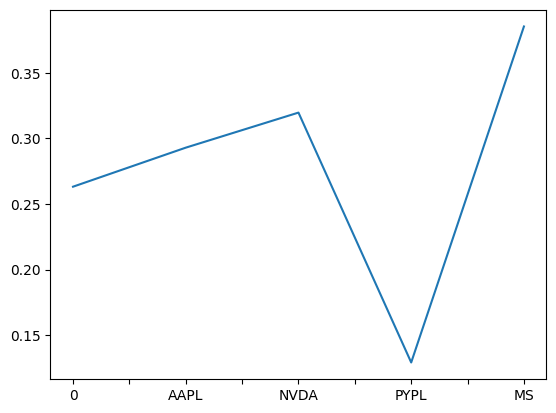

In [33]:
# Calculate rolling standard deviation 
annualized_std.rolling(window=21)

# Plot rolling standard deviation 
annualized_std.rolling(window=21)
annualized_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

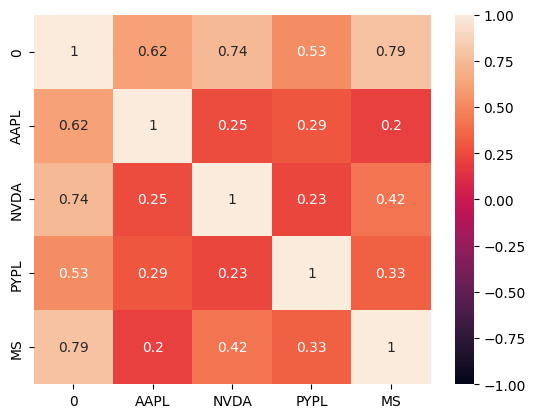

In [34]:
# Calculate and plot the correlation 
correlation = joined_portfolio.corr()
correlation

sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [35]:
# Calculate Rolling covariance of your portfolio 
SP500_df['Close'] = SP500_df['Close'].astype(float)

# Calculate the mean of the column without the NaN values
mean_value = SP500_df['Close'].mean()
 
# Replace NaNs with the mean value
SP500_df['Close'].fillna(mean_value, inplace=True)

# Calculate Daily Returns of Custom Portfolio
daily_returns_portfolio = joined_portfolio.pct_change().dropna() 
daily_returns_portfolio.head()

,0,AAPL,NVDA,PYPL,MS
2012-01-03,34.530272,1.065842,2.151589,-0.245283,-3.449903
2012-01-04,-1.483979,-0.058385,-1.321777,0.339707,-2.094305
2012-01-05,-1.561328,-1.151732,-1.000000,-1.000000,-1.808342
2012-01-06,1.777162,-3.257297,-inf,inf,1.257394
2012-01-07,-1.576821,-1.455327,3.853327,-4.103519,-0.708084


In [36]:
# Calculate Daily Returns of SP500
SP500_daily_returns = SP500_df.pct_change().dropna() 
SP500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [37]:
print(daily_returns_portfolio['NVDA'].index)
print(SP500_daily_returns['Close'].index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               '2012-01-11', '2012-01-12',
               ...
               '2012-08-27', '2012-08-28', '2012-08-29', '2012-08-30',
               '2012-08-31', '2012-09-01', '2012-09-02', '2012-09-03',
               '2012-09-04', '2012-09-05'],
              dtype='datetime64[ns]', length=247, freq='D')
DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)


In [43]:
# Assuming Daily_Returns and SP500_daily_returns are your data frames and they have 'Date' as their index
# Convert any string or integer indices to datetime if necessary
# FIX YOUR DAILY_RETURNS DATAFRAME
# Your daily_returns df needs to be the same form 
daily_returns_portfolio.index = pd.to_datetime(daily_returns_portfolio.index)
SP500_daily_returns.index = pd.to_datetime(SP500_daily_returns.index)

# Align Portfolio Returns index with SP500 index
daily_returns_aligned = daily_returns_portfolio.reindex(SP500_daily_returns.index)

# Alternatively, merge the dataframes on their indices 
# You are trying to merge two datagrames with DIFFERENt indexes 
# The dataframe without a Date index needs one
df_merged = pd.merge(daily_returns_aligned, SP500_daily_returns, left_index=True, right_index=True, how='inner')

# Handle missing data
df_merged.fillna(method='ffill', inplace=True)  # forward fill

# Now calculate the rolling covariance using the aligned data
rolling_covariance_MS = df_merged['MS'].rolling(window=60).cov(df_merged['Close']) 
rolling_covariance_NVDA = df_merged['NVDA'].rolling(window=60).cov(df_merged['Close']) 


variance_SP500 = df_merged['Close'].var()

beta_MS = rolling_covariance_MS/variance_SP500
beta_NVDA = rolling_covariance_NVDA/variance_SP500

rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000257
2019-04-16   -0.000256
2019-04-17   -0.000236
2019-04-18   -0.000211
2019-04-22   -0.000201
Length: 1042, dtype: float64

<AxesSubplot:xlabel='Date'>

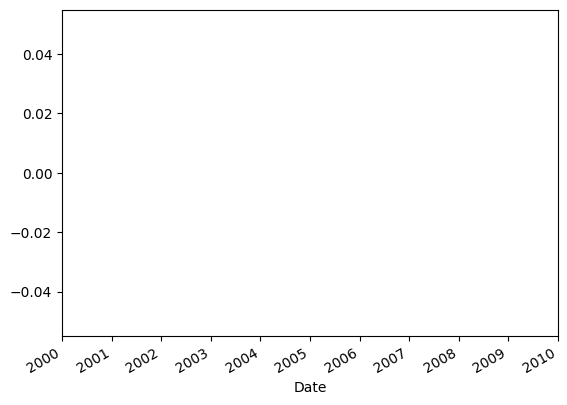

In [44]:
beta_MS.plot()


<AxesSubplot:xlabel='Date'>

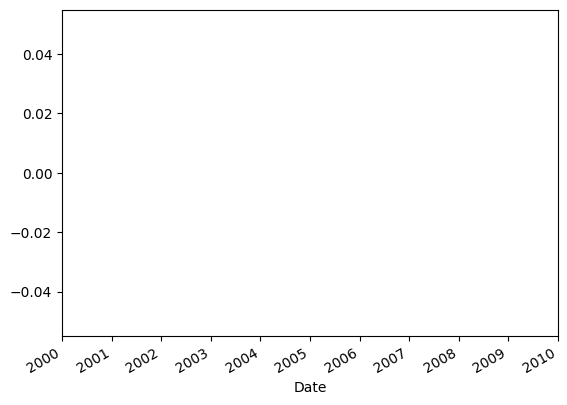

In [45]:
beta_NVDA.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios 



In [ ]:
# Visualize the sharpe ratios as a bar plot 



### How does your portfolio do?